In [91]:
! pip install mchmm
#https://github.com/maximtrp/mchmm

In [380]:
!pwd

/Users/yiwen/Documents/coding_practise/Ch_generation/scansion_comparison/m_scansion


In [381]:
import re

def extract_numbers_from_string(input_string):
    # Use regular expression to find all numbers in the input string
    numbers = re.findall(r'\d+', input_string)
    
    # Convert the extracted strings to integers
    numbers = [int(number) for number in numbers]
    
    return numbers[0]

extract_numbers_from_string("<t3>")

def number_to_letter(num):
    if 0 <= num <= 26:
        return chr(ord('A') + num)
    else:
        return None  # Return None for numbers outside the valid range

number_to_letter(23)

def count_same_letters(string1, string2):
    # Check if the strings have the same length
    if len(string1) != len(string2):
        raise ValueError("Strings must have the same length")

    # Initialize a count for different letters
    count = 0

    # Iterate through the strings and compare characters at the same index
    for i in range(len(string1)):
        if string1[i] == string2[i]:
            count += 1

    return count


In [382]:
import mchmm as mc
obs_seq = 'AGACTGCATATATAAGGGGCAGGCTG'
sts_seq = '00100000111111100000011111'
a = mc.HiddenMarkovModel().from_seq(obs_seq, sts_seq)

In [383]:
a.states,a.observations

(array(['0', '1'], dtype='<U1'), array(['A', 'C', 'G', 'T'], dtype='<U1'))

In [384]:
a.tp,a.ep

(array([[0.76923077, 0.23076923],
        [0.16666667, 0.83333333]]),
 array([[0.23076923, 0.23076923, 0.46153846, 0.07692308],
        [0.38461538, 0.07692308, 0.23076923, 0.30769231]]))

In [385]:
pd.DataFrame(a.ep, index=a.states, columns=a.observations)

,A,C,G,T
0,0.230769,0.230769,0.461538,0.076923
1,0.384615,0.076923,0.230769,0.307692


In [386]:
new_obs = "GGCATTGGGCTATAAGAGGAGCTTC"
vs, vsi = a.viterbi(new_obs)
# states sequence
print("VI", "".join(vs))
# observations
print("NO", new_obs)

VI 0011100001111111111111111
NO GGCATTGGGCTATAAGAGGAGCTTC


# 5-height

In [572]:
#preprocess: filter out lines starting with '<t0>'

processed_melody = list()
processed_scansion = list()

with open("./5_height_scansion_from_cantonese_songs.txt","r") as fin:
    lines = [line.strip() for line in fin.readlines()]
    c = 0
    for sent in lines[1:]:
        sent = sent.split("\t")
        melody,scansion = sent[0].split()," ".join(sent[1].split())
        if scansion.split()[0] != "<t0>":
            melody_symbols = list()
            for m in melody:
                melody_symbols.append(number_to_letter(int(m)))
            processed_melody.append(melody_symbols)
            processed_scansion.append([str(extract_numbers_from_string(x)) for x in scansion.split()])
                    
test_melody = processed_melody[round(len(processed_melody)*0.9):]
test_scansion = processed_scansion[round(len(processed_scansion)*0.9):]
train_melody = processed_melody[:round(len(processed_melody)*0.9)]
train_scansion = processed_scansion[:round(len(processed_scansion)*0.9)]

print(len(test_melody),len(test_melody) == len(test_scansion))

833 True


In [573]:
len(train_melody)

7502

In [574]:
test_melody

[['J', 'E', 'C', 'E', 'C', 'A', 'A'],
 ['H', 'F', 'D', 'A', 'A'],
 ['F', 'E', 'C', 'A', 'A'],
 ['C', 'F', 'F', 'F', 'E', 'C', 'H', 'J', 'J', 'A'],
 ['B', 'D', 'F', 'H', 'I', 'H', 'H', 'D', 'A', 'D'],
 ['A', 'A', 'B', 'D'],
 ['A', 'A', 'B', 'A'],
 ['H', 'F', 'D', 'A', 'A'],
 ['F', 'E', 'C', 'E', 'A'],
 ['D', 'C', 'A', 'H', 'C', 'C'],
 ['C', 'F', 'F', 'F', 'E', 'C', 'H', 'J', 'J', 'A'],
 ['B', 'D', 'F', 'H', 'I', 'H', 'H', 'D', 'A', 'D'],
 ['A', 'A', 'B', 'D'],
 ['A', 'A', 'B', 'A'],
 ['A', 'C', 'E', 'E', 'F', 'H', 'F', 'H', 'J', 'M'],
 ['D', 'D', 'D', 'D', 'C', 'A', 'A', 'C', 'D', 'D', 'C', 'A'],
 ['J', 'E', 'E', 'E', 'C', 'A', 'A', 'C', 'E', 'E'],
 ['D', 'D', 'D', 'D', 'B', 'A', 'A', 'B', 'D', 'D', 'F', 'G'],
 ['D', 'D', 'D', 'D', 'B', 'A', 'B', 'D'],
 ['D', 'D', 'D', 'D', 'C', 'A', 'A', 'C', 'D', 'D', 'C', 'A'],
 ['J', 'E', 'E', 'E', 'C', 'A', 'A', 'C', 'E', 'E'],
 ['A', 'A', 'A', 'A', 'C', 'D', 'C'],
 ['C', 'D', 'C', 'A'],
 ['H', 'F', 'D', 'A', 'A'],
 ['H', 'F', 'D', 'A', 'A'],
 ['A'

In [575]:
train_scansion[0]

['3', '3', '2', '3', '1', '2', '4', '4', '0']

In [576]:
#training_data
train_obs = list()
train_hid = list()

# eval set
eval_obs = list()
eval_hid = list()


for idx in range(len(train_melody)):
    lst1 = train_melody[idx]
    lst2 = train_scansion[idx]
    train_obs += lst1
    train_hid += lst2
    
for idx in range(len(test_melody)):
    lst1 = test_melody[idx]
    lst2 = test_scansion[idx]
    eval_obs += lst1
    eval_hid += lst2
    
print(len(train_obs),len(train_hid))
print(len(eval_obs),len(eval_hid))

49922 49922
5640 5640


In [577]:
len(processed_melody)

8335

In [578]:
processed_melody

[['J', 'J', 'K', 'J', 'H', 'F', 'H', 'H', 'A'],
 ['I', 'I', 'K', 'I', 'H', 'F', 'H', 'H', 'A'],
 ['C', 'K', 'H', 'E', 'A', 'E', 'F', 'F', 'H'],
 ['C', 'E', 'A', 'C'],
 ['E', 'E', 'F', 'E', 'C', 'A', 'C'],
 ['D', 'H', 'A', 'D', 'F', 'F'],
 ['D', 'D', 'A', 'D', 'I', 'M', 'F', 'F', 'H'],
 ['C', 'K', 'H', 'E', 'A', 'J', 'F'],
 ['J', 'J', 'K', 'J', 'H', 'F', 'H', 'H', 'A'],
 ['I', 'I', 'K', 'I', 'H', 'F', 'H', 'H', 'A'],
 ['C', 'K', 'J', 'H', 'E', 'A', 'E', 'F', 'F', 'H', 'H', 'F', 'H'],
 ['E', 'E', 'F', 'C', 'A', 'C'],
 ['B', 'B', 'D', 'A', 'A'],
 ['F', 'J', 'C', 'F', 'H', 'H', 'A'],
 ['D', 'A', 'D', 'I', 'M', 'F', 'F', 'H'],
 ['F', 'N', 'M', 'K', 'H', 'A', 'M', 'I'],
 ['H', 'E', 'H', 'C', 'E', 'C', 'A'],
 ['D', 'C', 'A', 'C', 'D', 'C', 'D', 'F', 'H'],
 ['H', 'E', 'H', 'C', 'E', 'C', 'A'],
 ['D', 'C', 'A', 'C', 'D', 'C', 'D', 'F', 'D'],
 ['H', 'E', 'H', 'C', 'E', 'C', 'A'],
 ['D', 'C', 'A', 'C', 'D', 'C', 'D', 'F', 'H'],
 ['D', 'A', 'D', 'K', 'I', 'H', 'I'],
 ['D', 'C', 'A', 'C', 'D', 'C',

In [579]:
# #training_data
# train_obs = list()
# train_hid = list()

# # eval set
# eval_obs = list()
# eval_hid = list()

# idx_store_train_miss = list()
# idx_store_test_miss = list()



# with open("./5_height_scansion_from_cantonese_songs.txt","r") as fin:
#     lines = [line.strip() for line in fin.readlines()]
#     c = 0
#     for sent in lines[1:round(len(lines)*0.9)]:
#         sent = sent.split("\t")
#         melody,scansion = sent[0].split()," ".join(sent[1].split())
#         if scansion.split()[0]!= "<t0>":
#             melody_symbols = list()
#             for m in melody:
#                 train_obs.append(number_to_letter(int(m)))
#             for x in scansion.split():
#                 train_hid.append(str(extract_numbers_from_string(x)))
#         else:
#             idx_store_train_miss.append(c)
#         c += 1
#     for sent in lines[round(len(lines)*0.9):]:
#         sent = sent.split("\t")
#         melody,scansion = sent[0].split()," ".join(sent[1].split())
#         if scansion.split()[0]!= "<t0>":
#             eval_obs.append(melody)
#             eval_hid.append(scansion.split())
#         else:
#             idx_store_test_miss.append(c)
#         c += 1

In [580]:
print(len(train_obs),len(train_hid))

49922 49922


In [581]:
eval_obs

['J',
 'E',
 'C',
 'E',
 'C',
 'A',
 'A',
 'H',
 'F',
 'D',
 'A',
 'A',
 'F',
 'E',
 'C',
 'A',
 'A',
 'C',
 'F',
 'F',
 'F',
 'E',
 'C',
 'H',
 'J',
 'J',
 'A',
 'B',
 'D',
 'F',
 'H',
 'I',
 'H',
 'H',
 'D',
 'A',
 'D',
 'A',
 'A',
 'B',
 'D',
 'A',
 'A',
 'B',
 'A',
 'H',
 'F',
 'D',
 'A',
 'A',
 'F',
 'E',
 'C',
 'E',
 'A',
 'D',
 'C',
 'A',
 'H',
 'C',
 'C',
 'C',
 'F',
 'F',
 'F',
 'E',
 'C',
 'H',
 'J',
 'J',
 'A',
 'B',
 'D',
 'F',
 'H',
 'I',
 'H',
 'H',
 'D',
 'A',
 'D',
 'A',
 'A',
 'B',
 'D',
 'A',
 'A',
 'B',
 'A',
 'A',
 'C',
 'E',
 'E',
 'F',
 'H',
 'F',
 'H',
 'J',
 'M',
 'D',
 'D',
 'D',
 'D',
 'C',
 'A',
 'A',
 'C',
 'D',
 'D',
 'C',
 'A',
 'J',
 'E',
 'E',
 'E',
 'C',
 'A',
 'A',
 'C',
 'E',
 'E',
 'D',
 'D',
 'D',
 'D',
 'B',
 'A',
 'A',
 'B',
 'D',
 'D',
 'F',
 'G',
 'D',
 'D',
 'D',
 'D',
 'B',
 'A',
 'B',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'A',
 'A',
 'C',
 'D',
 'D',
 'C',
 'A',
 'J',
 'E',
 'E',
 'E',
 'C',
 'A',
 'A',
 'C',
 'E',
 'E',
 'A',
 'A',
 'A',
 'A'

In [582]:
eval_hid

['4',
 '4',
 '2',
 '4',
 '4',
 '2',
 '2',
 '1',
 '4',
 '2',
 '3',
 '3',
 '4',
 '4',
 '2',
 '2',
 '2',
 '3',
 '2',
 '2',
 '2',
 '3',
 '3',
 '2',
 '1',
 '4',
 '0',
 '2',
 '2',
 '2',
 '3',
 '1',
 '1',
 '1',
 '2',
 '3',
 '2',
 '3',
 '3',
 '2',
 '2',
 '3',
 '3',
 '2',
 '3',
 '1',
 '4',
 '2',
 '3',
 '3',
 '4',
 '2',
 '2',
 '4',
 '2',
 '2',
 '3',
 '0',
 '4',
 '3',
 '3',
 '3',
 '2',
 '2',
 '2',
 '2',
 '3',
 '2',
 '4',
 '2',
 '0',
 '2',
 '2',
 '2',
 '3',
 '4',
 '2',
 '4',
 '2',
 '2',
 '2',
 '3',
 '3',
 '2',
 '1',
 '3',
 '3',
 '2',
 '3',
 '4',
 '0',
 '3',
 '3',
 '2',
 '4',
 '0',
 '0',
 '3',
 '4',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '0',
 '3',
 '2',
 '2',
 '2',
 '3',
 '4',
 '2',
 '2',
 '4',
 '4',
 '2',
 '2',
 '4',
 '1',
 '4',
 '2',
 '4',
 '4',
 '4',
 '3',
 '3',
 '0',
 '2',
 '4',
 '0',
 '3',
 '2',
 '1',
 '1',
 '4',
 '1',
 '2',
 '3',
 '2',
 '4',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '2',
 '2',
 '2',
 '3',
 '3',
 '1',
 '1',
 '4',
 '1',
 '2',
 '2',
 '1',
 '4',
 '4',
 '2',
 '2',
 '2',
 '0'

In [583]:
obs_seq = "".join(train_obs)
sts_seq = "".join(train_hid)
a = mc.HiddenMarkovModel().from_seq(obs_seq, sts_seq)

a.states,a.observations

print(len(a.states),len(a.observations))

a.tp,a.ep

pd.DataFrame(a.ep, index=a.states, columns=a.observations)

5 23


,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,Z
0,0.672884,0.035942,0.110555,0.055960,0.025705,0.049136,0.002047,0.027525,0.004322,0.007507,...,0.000682,0.000000,0.000000,0.000000,0.000000,0.000227,0.000000,0.000227,0.000000,0.000000
1,0.048099,0.007194,0.169990,0.098253,0.112436,0.183967,0.020761,0.173279,0.037205,0.063926,...,0.000822,0.002261,0.001233,0.001439,0.000206,0.000206,0.000617,0.000000,0.000000,0.000000
2,0.191523,0.137561,0.080523,0.228373,0.033943,0.161606,0.008220,0.068221,0.048370,0.011296,...,0.001510,0.001062,0.000447,0.000391,0.000559,0.000168,0.000280,0.000000,0.000056,0.000000
3,0.392506,0.022032,0.248397,0.042980,0.142935,0.049481,0.010384,0.054086,0.005147,0.016795,...,0.000090,0.002438,0.000000,0.000451,0.000000,0.000000,0.000090,0.000000,0.000000,0.000000
4,0.048876,0.006836,0.135692,0.094762,0.135606,0.183799,0.016064,0.184995,0.047680,0.060925,...,0.001624,0.003503,0.001196,0.001282,0.001709,0.000085,0.000513,0.000000,0.000085,0.000171


In [584]:
new_obs = "GGCATTGGGCTATAAGAGGAGCTTC"
vs, vsi = a.viterbi(new_obs)
# states sequence
print("VI", "".join(vs))
# observations
print("NO", new_obs)

VI 4232233322323030330322223
NO GGCATTGGGCTATAAGAGGAGCTTC


In [585]:
eval_obs

['J',
 'E',
 'C',
 'E',
 'C',
 'A',
 'A',
 'H',
 'F',
 'D',
 'A',
 'A',
 'F',
 'E',
 'C',
 'A',
 'A',
 'C',
 'F',
 'F',
 'F',
 'E',
 'C',
 'H',
 'J',
 'J',
 'A',
 'B',
 'D',
 'F',
 'H',
 'I',
 'H',
 'H',
 'D',
 'A',
 'D',
 'A',
 'A',
 'B',
 'D',
 'A',
 'A',
 'B',
 'A',
 'H',
 'F',
 'D',
 'A',
 'A',
 'F',
 'E',
 'C',
 'E',
 'A',
 'D',
 'C',
 'A',
 'H',
 'C',
 'C',
 'C',
 'F',
 'F',
 'F',
 'E',
 'C',
 'H',
 'J',
 'J',
 'A',
 'B',
 'D',
 'F',
 'H',
 'I',
 'H',
 'H',
 'D',
 'A',
 'D',
 'A',
 'A',
 'B',
 'D',
 'A',
 'A',
 'B',
 'A',
 'A',
 'C',
 'E',
 'E',
 'F',
 'H',
 'F',
 'H',
 'J',
 'M',
 'D',
 'D',
 'D',
 'D',
 'C',
 'A',
 'A',
 'C',
 'D',
 'D',
 'C',
 'A',
 'J',
 'E',
 'E',
 'E',
 'C',
 'A',
 'A',
 'C',
 'E',
 'E',
 'D',
 'D',
 'D',
 'D',
 'B',
 'A',
 'A',
 'B',
 'D',
 'D',
 'F',
 'G',
 'D',
 'D',
 'D',
 'D',
 'B',
 'A',
 'B',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'A',
 'A',
 'C',
 'D',
 'D',
 'C',
 'A',
 'J',
 'E',
 'E',
 'E',
 'C',
 'A',
 'A',
 'C',
 'E',
 'E',
 'A',
 'A',
 'A',
 'A'

In [590]:
mean_performance_5 = list()

with open("./scansion_results/hmm_scansion_5_height.txt","w") as fout:
    for idx in range(len(test_melody)):
        eva = test_melody[idx]
        tmp = str()

        true_scansion = test_scansion[idx]
        true = str()
        for x in true_scansion:
            true += x
        for e in eva:
            tmp += e
    #     print(tmp)

        new_obs = tmp
        vs, vsi = a.viterbi(new_obs)
        # states sequence
    #     print("VI", "".join(vs))
        # observations
    #     print("NO", new_obs)
        print(true,"".join(vs))
        fout.write(" ".join(vs) + "\n")
        mean_performance_5.append(count_same_letters("".join(vs), true)/len(true))

4424422 4232300
14233 42300
44222 42300
3222332140 2223232230
2223111232 2232333030
3322 0230
3323 0230
14233 42300
42242 42300
230433 032223
3222232420 2223232230
2223424222 2232333030
3321 0230
3323 0230
4033240034 0332324444
222223032223 423233233230
4224422414 4232332330
244433024032 423233233230
11412324 42323230
222223332223 423233233230
3114122144 4232332330
2220344 0032323
3233 2230
10232 42300
11233 42300
300243241303242 032332322332444
342321222232422 444223233232330
342331442032332 444444423222323
22144222241 42333222323
21222243323 22223233230
3440402232 4442333230
3244421 0322323
24443004 42333230
22222031 42333223
2244022242 0233244444
2232332342 2322322330
342331442032332 444223233232330
41442 44230
44230 44230
442 000
44230 44230
442 000
420 000
442 000
1230 4230
442 000
4230 4230
32444422 02323230
33233 03223
2001442 0323230
302113200 023232323
1244212 2232300
1224242 0323230
44444220003 44442233230
422301 032323
402423200 023232323
32114122 02323230
2224242 2232300
22

In [592]:
!wc ./scansion_results/hmm_scansion_5_height.txt

     833    5640   11280 ./scansion_results/hmm_scansion_5_height.txt


In [587]:
mean_performance_5

[0.14285714285714285,
 0.0,
 0.2,
 0.5,
 0.3,
 0.0,
 0.0,
 0.0,
 0.4,
 0.3333333333333333,
 0.6,
 0.2,
 0.0,
 0.0,
 0.2,
 0.4166666666666667,
 0.3,
 0.25,
 0.0,
 0.4166666666666667,
 0.1,
 0.14285714285714285,
 0.5,
 0.0,
 0.0,
 0.13333333333333333,
 0.4,
 0.26666666666666666,
 0.36363636363636365,
 0.45454545454545453,
 0.4,
 0.14285714285714285,
 0.125,
 0.125,
 0.2,
 0.5,
 0.3333333333333333,
 0.2,
 1.0,
 0.0,
 1.0,
 0.0,
 0.3333333333333333,
 0.0,
 0.75,
 0.0,
 1.0,
 0.125,
 0.6,
 0.0,
 0.0,
 0.14285714285714285,
 0.2857142857142857,
 0.45454545454545453,
 0.3333333333333333,
 0.0,
 0.125,
 0.2857142857142857,
 0.0,
 0.45454545454545453,
 0.3333333333333333,
 0.0,
 0.125,
 0.2857142857142857,
 0.14285714285714285,
 0.2,
 0.14285714285714285,
 0.0,
 0.3333333333333333,
 0.2,
 0.3333333333333333,
 0.2,
 0.3333333333333333,
 0.125,
 0.2,
 0.14285714285714285,
 0.25,
 0.2727272727272727,
 0.45454545454545453,
 0.3333333333333333,
 0.25,
 0.375,
 0.625,
 0.1111111111111111,
 0.4,
 0.375

In [588]:
sum(mean_performance_5)/len(mean_performance_5)

0.2189800333955055

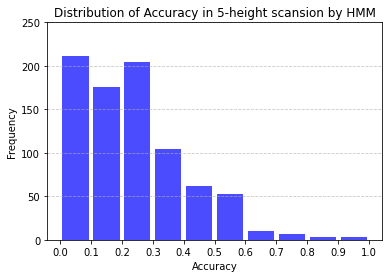

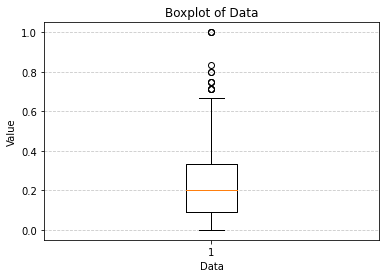

In [589]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your own list of numbers)
data = mean_performance_5

# Define the range and interval for the x-axis
x_min = min(data)
x_max = max(data)
x_interval = 0.1
bins = np.arange(x_min, x_max + x_interval, x_interval)

# Create a histogram
plt.hist(data, bins=bins, color='blue', alpha=0.7, rwidth=0.85)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval))
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.ylim(0,250)
plt.title('Distribution of Accuracy in 5-height scansion by HMM')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Create a boxplot
plt.boxplot(data)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Boxplot of Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# 4-height

In [410]:
# mapping
symbol2num = {"<d>":"1","<l>":"2","<m>":"3","<h>":"5"}
#training_data
train_obs = list()
train_hid = list()

# eval set
eval_obs = list()
eval_hid = list()


with open("./4_height_scansion_from_cantonese_songs.txt","r") as fin:
    lines = [line.strip() for line in fin.readlines()]
    c = 0
    for sent in lines[1:round(len(lines)*0.9)]:
        sent = sent.split("\t")
        melody,scansion = sent[0].split()," ".join(sent[1].split())
        if c not in idx_store_train_miss:
            melody_symbols = list()
            for m in melody:
                train_obs.append(number_to_letter(int(m)))
            for x in scansion.split():
                train_hid.append(symbol2num[x])
        c += 1
    for sent in lines[round(len(lines)*0.9):]:
        sent = sent.split("\t")
        melody,scansion = sent[0].split()," ".join(sent[1].split())
        if  c not in idx_store_test_miss:
            eval_obs.append(melody)
            eval_hid.append(scansion.split())
        c += 1

In [411]:
obs_seq = "".join(train_obs)
sts_seq = "".join(train_hid)
a = mc.HiddenMarkovModel().from_seq(obs_seq, sts_seq)

a.states,a.observations

print(len(a.states),len(a.observations))

a.tp,a.ep

pd.DataFrame(a.ep, index=a.states, columns=a.observations)

4 23


,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,Z
1,0.671928,0.035626,0.110485,0.056595,0.025930,0.049605,0.002029,0.027508,0.004284,0.007666,...,0.000676,0.000000,0.000000,0.000000,0.000000,0.000225,0.000000,0.000225,0.000000,0.00000
2,0.392461,0.021938,0.248746,0.042711,0.142461,0.049606,0.010297,0.054173,0.005104,0.017371,...,0.000090,0.002418,0.000000,0.000448,0.000000,0.000000,0.000090,0.000000,0.000000,0.00000
3,0.191225,0.137159,0.080822,0.228451,0.034234,0.161866,0.008254,0.068192,0.048194,0.011356,...,0.001496,0.001053,0.000443,0.000388,0.000554,0.000166,0.000277,0.000000,0.000055,0.00000
5,0.048360,0.006943,0.145320,0.095763,0.129459,0.183086,0.017297,0.181650,0.044589,0.062665,...,0.001377,0.003112,0.001197,0.001317,0.001257,0.000120,0.000539,0.000000,0.000060,0.00012


In [412]:
mean_performance_4 = list()

for idx in range(len(eval_obs)):
    eva = eval_obs[idx]
    tmp = str()

    true_scansion = eval_hid[idx]
#     print(true_scansion)
    true = str()
    for t in true_scansion:
        true += symbol2num[t]
        
    for e in eva:
        tmp += number_to_letter(int(e))
#     print(tmp)

    new_obs = tmp
    vs, vsi = a.viterbi(new_obs)
    # states sequence
#     print("VI", "".join(vs))
    # observations
#     print("NO", new_obs)
    print(true,"".join(vs))
    mean_performance_4.append(count_same_letters("".join(vs), true)/len(true))

3355553 3232321
55555331112 55553322321
533215 323232
513532321 332323232
23555533 23232321
5355253 3323211
5355353 3323211
25223 23232
3335552 1232321
5525 3232
335333 332321
35532 32321
335355 332321
33531 32321
535222 332321
53553235 33232321
25223 23232
3335553 1232321
5225 3232
33535335532 33232232321
53535335123 33232232321
535532 332321
53553213 33232321
53535353 33232321
53535321 33232321
233555533 355555332
53535 33232
53535353 33232321
535233 332321
335155333 233333211
35523 32232
55333 32232
5551355 5323321
35353553332 35535322321
353535 323332
53322 32321
553253 322232
211132 322232
253255313533 335553235532
315 321
55533553 32332321
3552353 3223232
55353 32232
35151155355 35535322321
253 232
253 232
2223521 3323321
3333552 3323321
253 232
253 232
2223521 3323321
3333532 3323321
25533 32332
215 321
321 321
5323522 3323321
3253 3321
2553 3321
32553 32321
3255353 3322321
55553322 32233211
55553322 32233211
5233553323 2332233232
55332323 32233211
55553322 32233211
5533553323 3

213323553 323235555
321323 323221
222535 123332
321253 335532
323511233553 553232355321
323511235553 553232355321
535335 223232
225225 123232
5553235355 3323322332
555335 223232
555323 223232
555533 223232
555335 223232
355325 223232
333255 112321
3123 3232
3333535123 3232323232
3123 3232
355 232
3215 3232
51123 12321
33333532 33323211
511235 123232
3333323253 1111112321
3333332333 1111112321
25335 32321
3333323253 1111112321
2533553 3233232
3333332333 1111112321
3333335 3333321
5555533 5555321
513225 323232
3535532 5555321
552553 322321
2212 3232
2523553 3232321
5535 3232
232335 323221
55555353 32332232
2555333353 3232333232
355323 323232
333323 323221
3531312331233 3232235535555
2555332555 3232333232
355323 323232
353323 323221
353231235 323223555
5535532 5555321
523522 322321
212 332
32332 33232
255 321
355 321
35535 32232
212553 323321
23513 33211
213 332
3211232 3323232
323 321
353 321
323 321
353 321
5535 3232
323 321
353 321
31355 33221
31355 33221
311325532 335555321
32355 3322

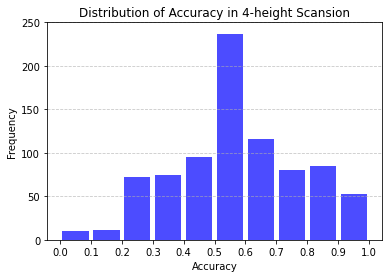

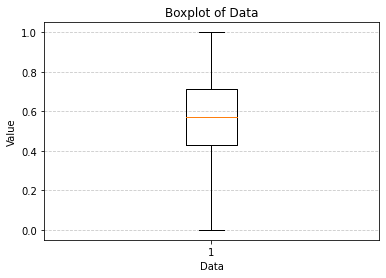

In [534]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your own list of numbers)
data = mean_performance

# Define the range and interval for the x-axis
x_min = min(data)
x_max = max(data)
x_interval = 0.1
bins = np.arange(x_min, x_max + x_interval, x_interval)

# Create a histogram
plt.hist(data, bins=bins, color='blue', alpha=0.7, rwidth=0.85)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval))
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.ylim(0,250)
plt.title('Distribution of Accuracy in 4-height Scansion')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Create a boxplot
plt.boxplot(data)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Boxplot of Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [414]:
print(len(mean_performance))

775


# 3-height

In [593]:
# mapping
symbol2num = {"<l>":"1","<m>":"2","<h>":"5"}
#training_data
train_obs = list()
train_hid = list()

# eval set
eval_obs = list()
eval_hid = list()


with open("./3_height_scansion_from_cantonese_songs.txt","r") as fin:
    lines = [line.strip() for line in fin.readlines()]
    c = 0
    for sent in lines[1:round(len(lines)*0.91)]:
        sent = sent.split("\t")
        melody,scansion = sent[0].split()," ".join(sent[1].split())
        melody_symbols = list()
        if c not in idx_store_train_miss:
            for m in melody:
                train_obs.append(number_to_letter(int(m)))
            for x in scansion.split():
                train_hid.append(symbol2num[x])
        c += 1
    for sent in lines[round(len(lines)*0.91):]:
        sent = sent.split("\t")
        melody,scansion = sent[0].split()," ".join(sent[1].split())
        if c not in idx_store_test_miss:
            eval_obs.append(melody)
            eval_hid.append(scansion.split())
        c += 1

In [617]:
# mapping
symbol2num = {"<l>":"1","<m>":"3","<h>":"5"}

#preprocess: filter out lines starting with '<t0>'

with open("./5_height_scansion_from_cantonese_songs.txt","r") as fin:
    five_height = [line.strip() for line in fin.readlines()]
    
with open("./3_height_scansion_from_cantonese_songs.txt","r") as fin:
    three_height = [line.strip() for line in fin.readlines()]   


print(len(five_height),len(three_height))

processed_melody = list()
processed_scansion = list()

for idx in range(1,len(five_height[1:])+1):
    sent = five_height[idx]
    sent = sent.split("\t")
    melody,scansion = sent[0].split()," ".join(sent[1].split())
    if scansion.split()[0] != "<t0>":
        scansion_three = " ".join(three_height[idx].split("\t")[1].split())
        melody_symbols = list()
        for m in melody:
            melody_symbols.append(number_to_letter(int(m)))
        processed_melody.append(melody_symbols)
        processed_scansion.append([s for s in scansion_three.split()])

print(len(processed_scansion) == len(processed_melody))

print(len(processed_melody))

11500 11500
True
8335


In [618]:
test_melody = processed_melody[round(len(processed_melody)*0.9):]
test_scansion = processed_scansion[round(len(processed_scansion)*0.9):]
train_melody = processed_melody[:round(len(processed_melody)*0.9)]
train_scansion = processed_scansion[:round(len(processed_scansion)*0.9)]

print(len(test_melody),len(test_melody) == len(test_scansion))

833 True


In [619]:
test_scansion_convert = list()

for seq in test_scansion:
    seq = [symbol2num[s] for s in seq]
    test_scansion_convert.append(seq)

In [620]:
test_scansion_convert[0]

['5', '5', '3', '5', '5', '3', '3']

In [621]:
print(processed_scansion[0])
print(processed_melody[0])

['<m>', '<m>', '<m>', '<m>', '<h>', '<m>', '<h>', '<h>', '<l>']
['J', 'J', 'K', 'J', 'H', 'F', 'H', 'H', 'A']


In [622]:
#training_data
train_obs = list()
train_hid = list()

# eval set
eval_obs = list()
eval_hid = list()


for idx in range(len(train_melody)):
    lst1 = train_melody[idx]
    lst2 = train_scansion[idx]
    train_obs += lst1
    train_hid += [symbol2num[x] for x in lst2]
    
for idx in range(len(test_melody)):
    lst1 = test_melody[idx]
    lst2 = test_scansion[idx]
    eval_obs += lst1
    eval_hid += [symbol2num[x] for x in lst2]
    
print(len(train_obs),len(train_hid))
print(len(eval_obs),len(eval_hid))

49922 49922
5640 5640


In [623]:
train_hid

['3',
 '3',
 '3',
 '3',
 '5',
 '3',
 '5',
 '5',
 '1',
 '3',
 '3',
 '5',
 '3',
 '5',
 '3',
 '5',
 '5',
 '3',
 '3',
 '5',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '5',
 '5',
 '5',
 '3',
 '3',
 '5',
 '5',
 '5',
 '5',
 '5',
 '3',
 '5',
 '3',
 '5',
 '1',
 '3',
 '5',
 '5',
 '3',
 '3',
 '3',
 '3',
 '3',
 '5',
 '1',
 '1',
 '3',
 '3',
 '5',
 '5',
 '3',
 '1',
 '5',
 '3',
 '3',
 '3',
 '3',
 '3',
 '5',
 '3',
 '5',
 '5',
 '1',
 '3',
 '3',
 '3',
 '3',
 '5',
 '3',
 '3',
 '5',
 '3',
 '3',
 '5',
 '5',
 '3',
 '1',
 '3',
 '3',
 '3',
 '5',
 '5',
 '5',
 '3',
 '3',
 '3',
 '5',
 '5',
 '5',
 '3',
 '5',
 '3',
 '3',
 '5',
 '3',
 '3',
 '3',
 '5',
 '1',
 '3',
 '5',
 '5',
 '3',
 '3',
 '3',
 '3',
 '3',
 '5',
 '1',
 '1',
 '3',
 '3',
 '3',
 '5',
 '5',
 '3',
 '1',
 '5',
 '3',
 '5',
 '3',
 '5',
 '1',
 '5',
 '5',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '5',
 '5',
 '5',
 '3',
 '5',
 '3',
 '5',
 '5',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '5',
 '3',
 '5',
 '3',
 '5',
 '3',
 '5',
 '5',
 '3',
 '3',
 '3',
 '1'

In [624]:
obs_seq = "".join(train_obs)
sts_seq = "".join(train_hid)

In [625]:
len(obs_seq),len(sts_seq)

(49922, 49922)

In [626]:
a = mc.HiddenMarkovModel().from_seq(obs_seq, sts_seq)

a.states,a.observations

print(len(a.states),len(a.observations))

a.tp,a.ep

pd.DataFrame(a.ep, index=a.states, columns=a.observations)

3 23


,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,Z
1,0.672884,0.035942,0.110555,0.055960,0.025705,0.049136,0.002047,0.027525,0.004322,0.007507,...,0.000682,0.000000,0.000000,0.000000,0.000000,0.000227,0.000000,0.000227,0.000000,0.000000
3,0.268389,0.093377,0.144727,0.157469,0.075627,0.118724,0.009048,0.062815,0.031839,0.013399,...,0.000967,0.001589,0.000276,0.000414,0.000345,0.000104,0.000207,0.000000,0.000035,0.000000
5,0.048648,0.006941,0.145763,0.095787,0.128803,0.183848,0.017443,0.181555,0.044604,0.061806,...,0.001388,0.003139,0.001207,0.001328,0.001268,0.000121,0.000543,0.000000,0.000060,0.000121


In [627]:
test_scansion

[['<h>', '<h>', '<m>', '<h>', '<h>', '<m>', '<m>'],
 ['<h>', '<h>', '<m>', '<m>', '<m>'],
 ['<h>', '<h>', '<m>', '<m>', '<m>'],
 ['<m>', '<m>', '<m>', '<m>', '<m>', '<m>', '<m>', '<h>', '<h>', '<l>'],
 ['<m>', '<m>', '<m>', '<m>', '<h>', '<h>', '<h>', '<m>', '<m>', '<m>'],
 ['<m>', '<m>', '<m>', '<m>'],
 ['<m>', '<m>', '<m>', '<m>'],
 ['<h>', '<h>', '<m>', '<m>', '<m>'],
 ['<h>', '<m>', '<m>', '<h>', '<m>'],
 ['<m>', '<m>', '<l>', '<h>', '<m>', '<m>'],
 ['<m>', '<m>', '<m>', '<m>', '<m>', '<m>', '<m>', '<h>', '<m>', '<l>'],
 ['<m>', '<m>', '<m>', '<m>', '<h>', '<m>', '<h>', '<m>', '<m>', '<m>'],
 ['<m>', '<m>', '<m>', '<h>'],
 ['<m>', '<m>', '<m>', '<m>'],
 ['<h>', '<l>', '<m>', '<m>', '<m>', '<h>', '<l>', '<l>', '<m>', '<h>'],
 ['<m>',
  '<m>',
  '<m>',
  '<m>',
  '<m>',
  '<m>',
  '<l>',
  '<m>',
  '<m>',
  '<m>',
  '<m>',
  '<m>'],
 ['<h>', '<m>', '<m>', '<h>', '<h>', '<m>', '<m>', '<h>', '<h>', '<h>'],
 ['<m>',
  '<h>',
  '<h>',
  '<h>',
  '<m>',
  '<m>',
  '<l>',
  '<m>',
  '<h>',

In [605]:
mean_performance_3 = list()


    for idx in range(len(test_melody)):
        eva = test_melody[idx]
        tmp = str()

        true_scansion = test_scansion[idx]
        true = str()
        for x in true_scansion:
            true += x
        for e in eva:
            tmp += e
    #     print(tmp)

        new_obs = tmp
        vs, vsi = a.viterbi(new_obs)
        # states sequence
    #     print("VI", "".join(vs))
        # observations
    #     print("NO", new_obs)
        print(true,"".join(vs))
        fout.write(" ".join(vs) + "\n")
        mean_performance_3.append(count_same_letters("".join(vs), true)/len(true))

<h><h><m><h><h><m><m> 2222222


ValueError: Strings must have the same length

In [613]:
vs

array(['2', '2', '2', '2', '2', '2', '2'], dtype='<U1')

In [610]:
vs

array(['2', '2', '2', '2', '2', '2', '2'], dtype='<U1')

In [612]:
vs

array(['2', '2', '2', '2', '2', '2', '2'], dtype='<U1')

In [628]:
# mapping
num2sym = {"1":"<l>","3":"<m>","5":"<h>"}

mean_performance3 = list()

with open("./scansion_results/hmm_scansion_3_height.txt","w") as fout:
    for idx in range(len(test_melody)):
        eva = test_melody[idx]
        tmp = str()
        true_scansion = test_scansion_convert[idx]
        true = str()
        for x in true_scansion:
            true += x
        for e in eva:
            tmp += e
    #     print(tmp)

        new_obs = tmp
        vs, vsi = a.viterbi(new_obs)
        # states sequence
    #     print("VI", "".join(vs))
        # observations
    #     print("NO", new_obs)
        
        res = vs.tolist()
        res_list = list()
        for r in res:
            res_list.append(num2sym[r])
#         print(true,"".join(vs))
        fout.write(" ".join(res_list) + "\n")
        mean_performance3.append(count_same_letters("".join(vs), true)/len(true))

In [630]:
sum(mean_performance3)/len(mean_performance3)

0.5654498091375784

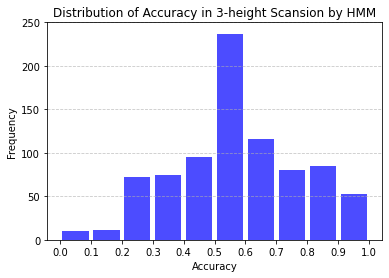

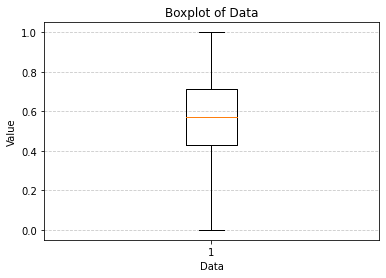

In [535]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your own list of numbers)
data = mean_performance

# Define the range and interval for the x-axis
x_min = min(data)
x_max = max(data)
x_interval = 0.1
bins = np.arange(x_min, x_max + x_interval, x_interval)

# Create a histogram
plt.hist(data, bins=bins, color='blue', alpha=0.7, rwidth=0.85)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval))
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.ylim(0,250)
plt.title('Distribution of Accuracy in 3-height Scansion by HMM')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Create a boxplot
plt.boxplot(data)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Boxplot of Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [1]:
import mchmm as mc
a = mc.MarkovChain().from_data('AABCABCBAAAACBCBACBABCABCBACBACBABABCBACBBCBBCBCBCBACBABABCBCBAAACABABCBBCBCBCBCBCBAABCBBCBCBCCCBABCBCBBABCBABCABCCABABCBABC')

In [2]:
a.observed_matrix

array([[ 7., 18.,  7.],
       [19.,  5., 29.],
       [ 5., 30.,  3.]])

In [93]:
observations[:10]

['<p9>',
 '<p9>',
 '<p10>',
 '<p9>',
 '<p7>',
 '<p5>',
 '<p7>',
 '<p7>',
 '<p0>',
 '<p8>']

In [88]:
obs = mc.MarkovChain().from_data(observations)

In [90]:
obs.observed_matrix

array([[3.283e+03, 1.700e+02, 3.400e+01, 2.180e+02, 6.000e+00, 2.100e+01,
        8.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.292e+03,
        0.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 3.094e+03,
        1.357e+03, 7.380e+02, 1.232e+03, 4.900e+01, 9.500e+02, 2.670e+02,
        4.150e+02],
       [9.700e+01, 1.960e+02, 1.000e+00, 1.450e+02, 6.000e+00, 1.200e+01,
        4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.600e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.700e+01,
        5.400e+01, 1.400e+01, 6.500e+01, 7.000e+00, 1.790e+02, 2.970e+02,
        3.580e+02],
       [1.700e+01, 2.000e+00, 3.800e+01, 6.500e+01, 1.000e+00, 6.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.000e+00,
        4.000e+00, 8.000e+00, 2.000e+00, 1.000e+00, 6.400e+01, 5.000e+00,
        1.400e+02],
       [1.070e+02, 3.200e+02, 9.300e+01, 2.230e+02, 

In [91]:
obs.observed_p_matrix

array([[2.49752758e-01, 1.29326740e-02, 2.58653480e-03, 1.65842526e-02,
        4.56447318e-04, 1.59756561e-03, 6.08596424e-04, 7.60745531e-05,
        2.28223659e-04, 7.60745531e-05, 7.60745531e-05, 9.82883226e-02,
        0.00000000e+00, 1.52149106e-04, 2.28223659e-04, 0.00000000e+00,
        0.00000000e+00, 2.35374667e-01, 1.03233169e-01, 5.61430202e-02,
        9.37238494e-02, 3.72765310e-03, 7.22708254e-02, 2.03119057e-02,
        3.15709395e-02],
       [6.51881720e-02, 1.31720430e-01, 6.72043011e-04, 9.74462366e-02,
        4.03225806e-03, 8.06451613e-03, 2.68817204e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.74731183e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.81451613e-02, 3.62903226e-02, 9.40860215e-03,
        4.36827957e-02, 4.70430108e-03, 1.20295699e-01, 1.99596774e-01,
        2.40591398e-01],
       [4.64480874e-02, 5.46448087e-03, 1.03825137e-01, 1.77595628e-01,
        2.7322

In [85]:
graph = obs.graph_make(
      format="png",
      graph_attr=[("rankdir", "LR")],
      node_attr=[("fontname", "Roboto bold"), ("fontsize", "20")],
      edge_attr=[("fontname", "Iosevka"), ("fontsize", "12")]
    )

In [86]:
graph.render()

'Digraph.gv.png'

In [92]:
import pandas as pd
pd.DataFrame(obs.observed_matrix, index=obs.states, columns=obs.states, dtype=int)

,<p0>,<p10>,<p11>,<p12>,<p13>,<p14>,<p15>,<p16>,<p17>,<p18>,...,<p24>,<p25>,<p2>,<p3>,<p4>,<p5>,<p6>,<p7>,<p8>,<p9>
<p0>,3283,170,34,218,6,21,8,1,3,1,...,0,0,3094,1357,738,1232,49,950,267,415
<p10>,97,196,1,145,6,12,4,0,0,0,...,0,0,27,54,14,65,7,179,297,358
<p11>,17,2,38,65,1,6,1,3,0,0,...,0,0,9,4,8,2,1,64,5,140
<p12>,107,320,93,223,18,53,8,5,1,0,...,0,0,19,28,25,60,0,112,47,121
<p13>,11,7,1,21,5,0,5,0,3,0,...,0,0,2,0,0,1,1,1,1,7
<p14>,18,6,10,68,1,11,3,8,4,0,...,0,0,3,2,1,4,0,4,3,16
<p15>,5,4,0,5,10,5,3,0,8,0,...,0,0,1,1,0,2,1,3,1,0
<p16>,7,0,2,12,0,9,0,3,5,3,...,0,0,1,0,0,0,0,0,0,0
<p17>,5,2,1,2,2,3,10,0,5,0,...,0,1,2,2,2,1,0,5,0,0
<p18>,3,0,0,0,0,0,0,0,0,1,...,0,1,2,0,0,1,0,0,0,0


In [78]:
obs.expected_matrix

array([[8.51309661e+02, 3.89126922e+02, 5.57690423e+02, 4.08379689e+02,
        3.24446931e+02, 5.17323594e+02, 4.21117925e+01, 4.20129112e+02,
        1.36630664e+02, 1.64724580e+02, 3.60800343e+03, 3.60806160e+03,
        3.60806160e+03],
       [3.89126922e+02, 1.77866843e+02, 2.54915887e+02, 1.86667130e+02,
        1.48302130e+02, 2.36464529e+02, 1.92489677e+01, 1.92037699e+02,
        6.24527972e+01, 7.52943047e+01, 1.64918987e+03, 1.64921646e+03,
        1.64921646e+03],
       [5.57690423e+02, 2.54915887e+02, 3.65341335e+02, 2.67528318e+02,
        2.12544218e+02, 3.38897145e+02, 2.75873098e+01, 2.75225330e+02,
        8.95063407e+01, 1.07910582e+02, 2.36359230e+03, 2.36363041e+03,
        2.36363041e+03],
       [4.08379689e+02, 1.86667130e+02, 2.67528318e+02, 1.95902828e+02,
        1.55639649e+02, 2.48164044e+02, 2.02013456e+01, 2.01539115e+02,
        6.55427637e+01, 7.90196283e+01, 1.73078656e+03, 1.73081446e+03,
        1.73081446e+03],
       [3.24446931e+02, 1.48302130e+

In [79]:
obs.n_order_matrix(obs.observed_p_matrix, order=2)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.22263940e-02, 3.07041089e-03, 1.03419432e-02, 5.56080624e-04,
        1.35230514e-03, 4.39399512e-04, 3.43461562e-04, 3.67994530e-04,
        8.99542185e-05, 8.99542185e-05, 4.79222720e-01, 4.91899382e-01,
        0.00000000e+00],
       [9.31179610e-05, 2.32588613e-05, 7.84765012e-05, 4.24047748e-06,
        1.02734527e-05, 3.27319563e-06, 2.61911844e-06, 2.80619833e-06,
        6.85959592e-07, 6.85959592e-07, 9.97914059e-01, 1.86650307e-03,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+

In [80]:
obs.chisquare(obs.observed_matrix, obs.expected_matrix, axis=None)

Power_divergenceResult(statistic=748014.3796984598, pvalue=0.0)

In [94]:
ids, states = obs.simulate(10, start='<p0>', seed=np.random.randint(0, 25, 25))

In [95]:
ids

array([ 0, 11, 18, 20, 22, 22, 24, 22,  0,  0])

In [96]:
states

array(['<p0>', '<p1>', '<p3>', '<p5>', '<p7>', '<p7>', '<p9>', '<p7>',
       '<p0>', '<p0>'], dtype='<U5')

In [99]:
len(observations)

62031

In [100]:
len(hidden)

62031

In [101]:
hidden[:10]

['<t3>',
 '<t3>',
 '<t2>',
 '<t3>',
 '<t1>',
 '<t2>',
 '<t4>',
 '<t4>',
 '<t0>',
 '<t2>']